# Multi-class Classification:Data Science in Hospitality Management
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns: 
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

# Load dataset

In [18]:
# Loading the Dataset 
import pandas as pd
hospital_dataFrame=pd.read_csv("train.csv")

# Questions

The train dataset contains 32,641 entries and 18 features.
The test dataset contains 3,627 entries and 17 features (excluding the target).

Continuous-valued Attributes: Features like no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, no_of_previous_cancellations, and no_of_previous_bookings_not_canceled are continuous in nature.

Categorical Attributes: Features such as type_of_meal_plan, required_car_parking_space, room_type_reserved (target variable), arrival_year, arrival_month, market_segment_type, repeated_guest, and booking_status are categorical.

In [19]:
hospital_dataFrame.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.0,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.0,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.4,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.0,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.5,0,Canceled


## Data Analysis


In [20]:
hospital_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  object 
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [21]:
hospital_dataFrame.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000
mean,1.846941,0.105205,0.810913,2.204528,0.031065,85.212830,2017.819858,7.429245,15.623909,0.025214,0.023529,0.153764,103.396869,0.621672
std,0.517504,0.400701,0.870699,1.408902,0.173497,85.837873,0.384311,3.067804,8.740196,0.156776,0.371302,1.759335,35.004782,0.787133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


#### Statistical Summary
##### Continuous Features:

no_of_adults: Mostly ranges between 0 to 4, with a mean of approximately 1.85, suggesting most bookings are by couples or individuals.</br>
no_of_children: On average, bookings include very few children, but there are outliers with up to 10 children.</br>
no_of_weekend_nights, no_of_week_nights: Shows variability in stay duration, with a wider range for weeknights.</br>
lead_time: A wide range, from 0 to 443 days, indicating some bookings are made well in advance, while others are last-minute.</br>
avg_price_per_room: Ranges from 0 (which might indicate free rooms or data errors) to 375.5, with a mean price of around 103.4. The presence of 0 may require special treatment.</br>
no_of_previous_cancellations, no_of_previous_bookings_not_canceled: Both features have a wide range but low mean values, indicating most guests do not have a history of cancellations or previous bookings.</br>
no_of_special_requests: Varies widely, suggesting diverse guest preferences.</br>
##### Categorical Features:

type_of_meal_plan: 4 unique types, with "Meal Plan 1" being the most common.
required_car_parking_space: Mostly 0, indicating that parking space is not commonly required.</br>
room_type_reserved: 6 types, with "Room_Type 1" being the most frequently booked.</br>
arrival_year, arrival_month: Data spans over 2 years, with the month of October having the highest bookings.</br>
market_segment_type: 5 segments, with "Online" being predominant.</br>
repeated_guest: Majority are not repeated guests.</br>
booking_status: More bookings are not canceled.</br>

##### Special Treatment Required:
avg_price_per_room: The presence of 0 values might need investigation, as these could be outliers or data errors.</br>
no_of_children, no_of_previous_cancellations, and no_of_previous_bookings_not_canceled: These features have outliers that may require normalization or outlier treatment.</br>

In [22]:
# Though there are no missing values, just cross verifying those
hospital_dataFrame.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [23]:
import pandas as pd
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Summarize the data
print("Summary of the data:")
print("Number of entries:", len(hospital_dataFrame))
print("Number of attributes/features:", len(hospital_dataFrame.columns))

# Identify continuous valued features
print("\nContinuous valued features:")
continuous_features = hospital_dataFrame.select_dtypes(include=['float64', 'int64']).columns
print(continuous_features)

# Identify categorical features
print("\nCategorical features:")
categorical_features = hospital_dataFrame.select_dtypes(include=['object']).columns
print(categorical_features)

# Displaying the statistical summary for continuous and categorical features
print("Statistical Summary for Continuous Features:")
display(hospital_dataFrame[continuous_features].describe())

print("\nStatistical Summary for Categorical Features:")
display(hospital_dataFrame[categorical_features].astype('object').describe())

Summary of the data:
Number of entries: 32641
Number of attributes/features: 18

Continuous valued features:
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

Categorical features:
Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')
Statistical Summary for Continuous Features:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000
mean,1.846941,0.105205,0.810913,2.204528,0.031065,85.212830,2017.819858,7.429245,15.623909,0.025214,0.023529,0.153764,103.396869,0.621672
std,0.517504,0.400701,0.870699,1.408902,0.173497,85.837873,0.384311,3.067804,8.740196,0.156776,0.371302,1.759335,35.004782,0.787133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000



Statistical Summary for Categorical Features:


,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,32641,32641,32641,32641
unique,4,6,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,25051,25317,20907,21980


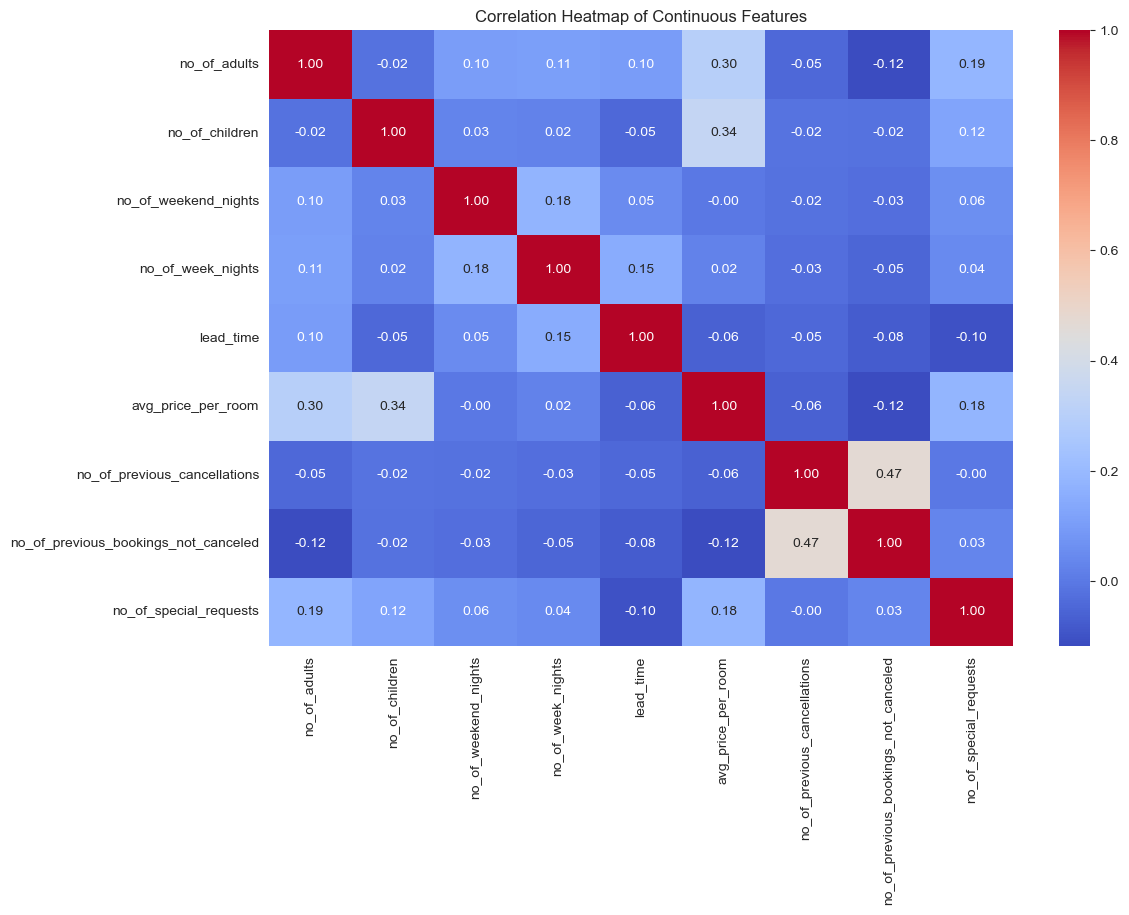

In [24]:
# Correlation matrix for continuous features
corr = hospital_dataFrame[continuous_features].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Features')
plt.show()


There's a notable positive correlation between no_of_weekend_nights and no_of_week_nights, suggesting that longer stays tend to span both weekdays and weekends, which is intuitive.</br>

no_of_adults shows a slight positive correlation with no_of_children, indicating that bookings with more adults also tend to include children, possibly reflecting family bookings.</br>

no_of_special_requests is slightly positively correlated with no_of_adults and no_of_children, suggesting that larger groups or families may have more specific needs or requests.</br>

Most other variables show low to negligible correlation with each other, indicating that they contribute independently to the predictive modeling.</br>

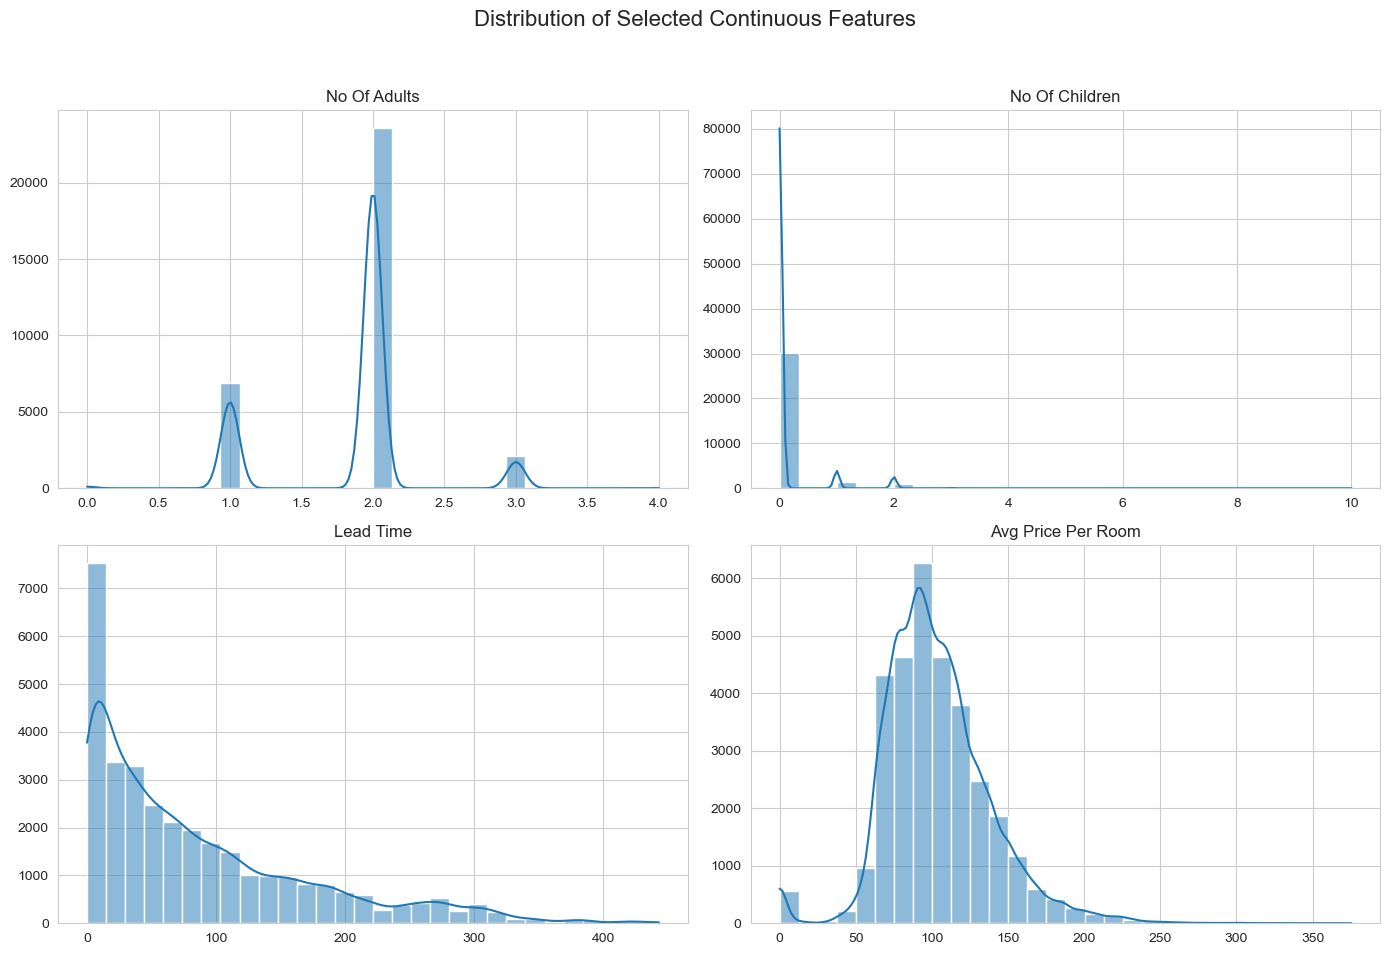

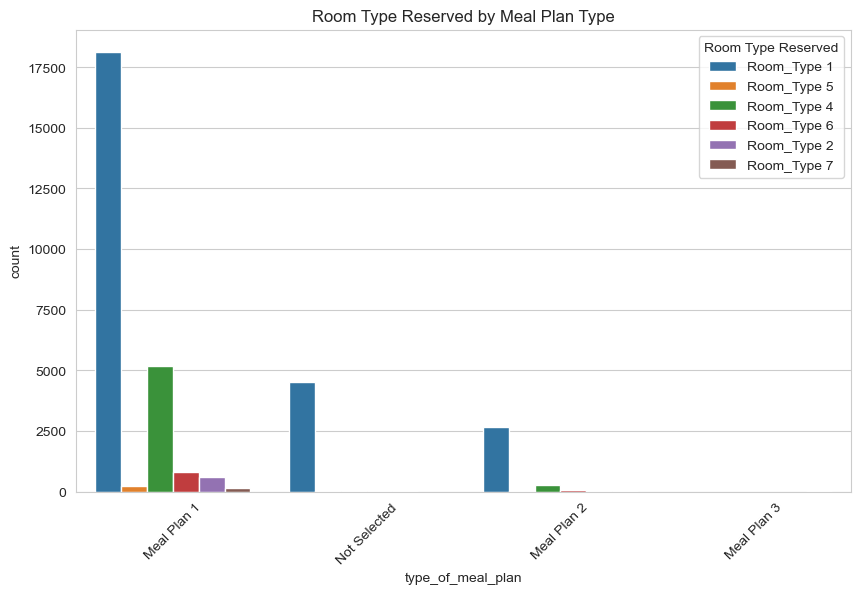

In [25]:
# Plotting distributions for selected continuous features
selected_features = ['no_of_adults', 'no_of_children', 'lead_time', 'avg_price_per_room']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Distribution of Selected Continuous Features', fontsize=16)

for ax, feature in zip(axes.flatten(), selected_features):
    sns.histplot(hospital_dataFrame[feature], kde=True, bins=30, ax=ax)
    ax.set_title(feature.replace('_', ' ').title())
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Investigating the relationship between a categorical feature and the target variable using bar plots
plt.figure(figsize=(10, 6))
sns.countplot(data=hospital_dataFrame, x='type_of_meal_plan', hue='room_type_reserved')
plt.title('Room Type Reserved by Meal Plan Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type Reserved', loc='upper right')
plt.show()

Among the key attributes, 'lead_time' and 'avg_price_per_room' stand out due to their wide variances, suggesting potential significance in our analysis. 'Lead_time' may require special treatment as longer lead times could indicate different booking behaviors or customer segments. Similarly, 'avg_price_per_room' might need special consideration as pricing could impact booking decisions significantly. Understanding the nuances of these attributes could involve segmentation analysis or considering them as influential factors in predictive modeling. Additionally, attributes like 'no_of_previous_cancellations' and 'no_of_previous_bookings_not_canceled' which mostly contain zeros may require special handling to account for their skewed distributions and potential impact on predictive models or analytical insights.

##  Data Pre-processing & Feature Engineering 
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary. 

Analyze the relationship between all the features. Use appropriate visualization techniques.

Perform Feature Engineering on the dataset.

Analyze the statistical values for every attribute and visual representations of the distributions for each attribute, such as a histogram.

In [28]:
import pandas as pd

# Define the target column
target_column = 'room_type_reserved'

# Creating y_train and y_test DataFrames
y_train = pd.DataFrame(hospital_dataFrame[target_column], columns=[target_column])
y_test = pd.DataFrame(hospital_dataFrame[target_column], columns=[target_column])

# Creating X_train and X_test DataFrames
X_train = hospital_dataFrame.drop([target_column], axis=1)
X_test = hospital_dataFrame.drop([target_column], axis=1)


We do have a few categorical values, so it is best to convert them to numerical using OneHotEncoder. This process ensures that each category is represented independently, preventing the model from assuming any ordinal relationship between categories. By performing one-hot encoding, the model's performance and accuracy can be improved.

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Define features to encode
selected_features = ["booking_status", "type_of_meal_plan", "market_segment_type"]

# Initialize OneHotEncoder
category_encoder = OneHotEncoder(sparse_output=False)

# Encode features for training data
encoded_train_features = category_encoder.fit_transform(X_train.loc[:, selected_features])
encoded_train_df = pd.DataFrame(encoded_train_features, columns=category_encoder.get_feature_names_out(selected_features))
train_encoded_data = pd.concat([X_train.drop(selected_features, axis=1), encoded_train_df], axis=1)

# Encode features for test data
encoded_test_features = category_encoder.transform(X_test.loc[:, selected_features])
encoded_test_df = pd.DataFrame(encoded_test_features, columns=category_encoder.get_feature_names_out(selected_features))
test_encoded_data = pd.concat([X_test.drop(selected_features, axis=1), encoded_test_df], axis=1)


array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>, <Axes: >,
        <Axes: >]], dtype=object)

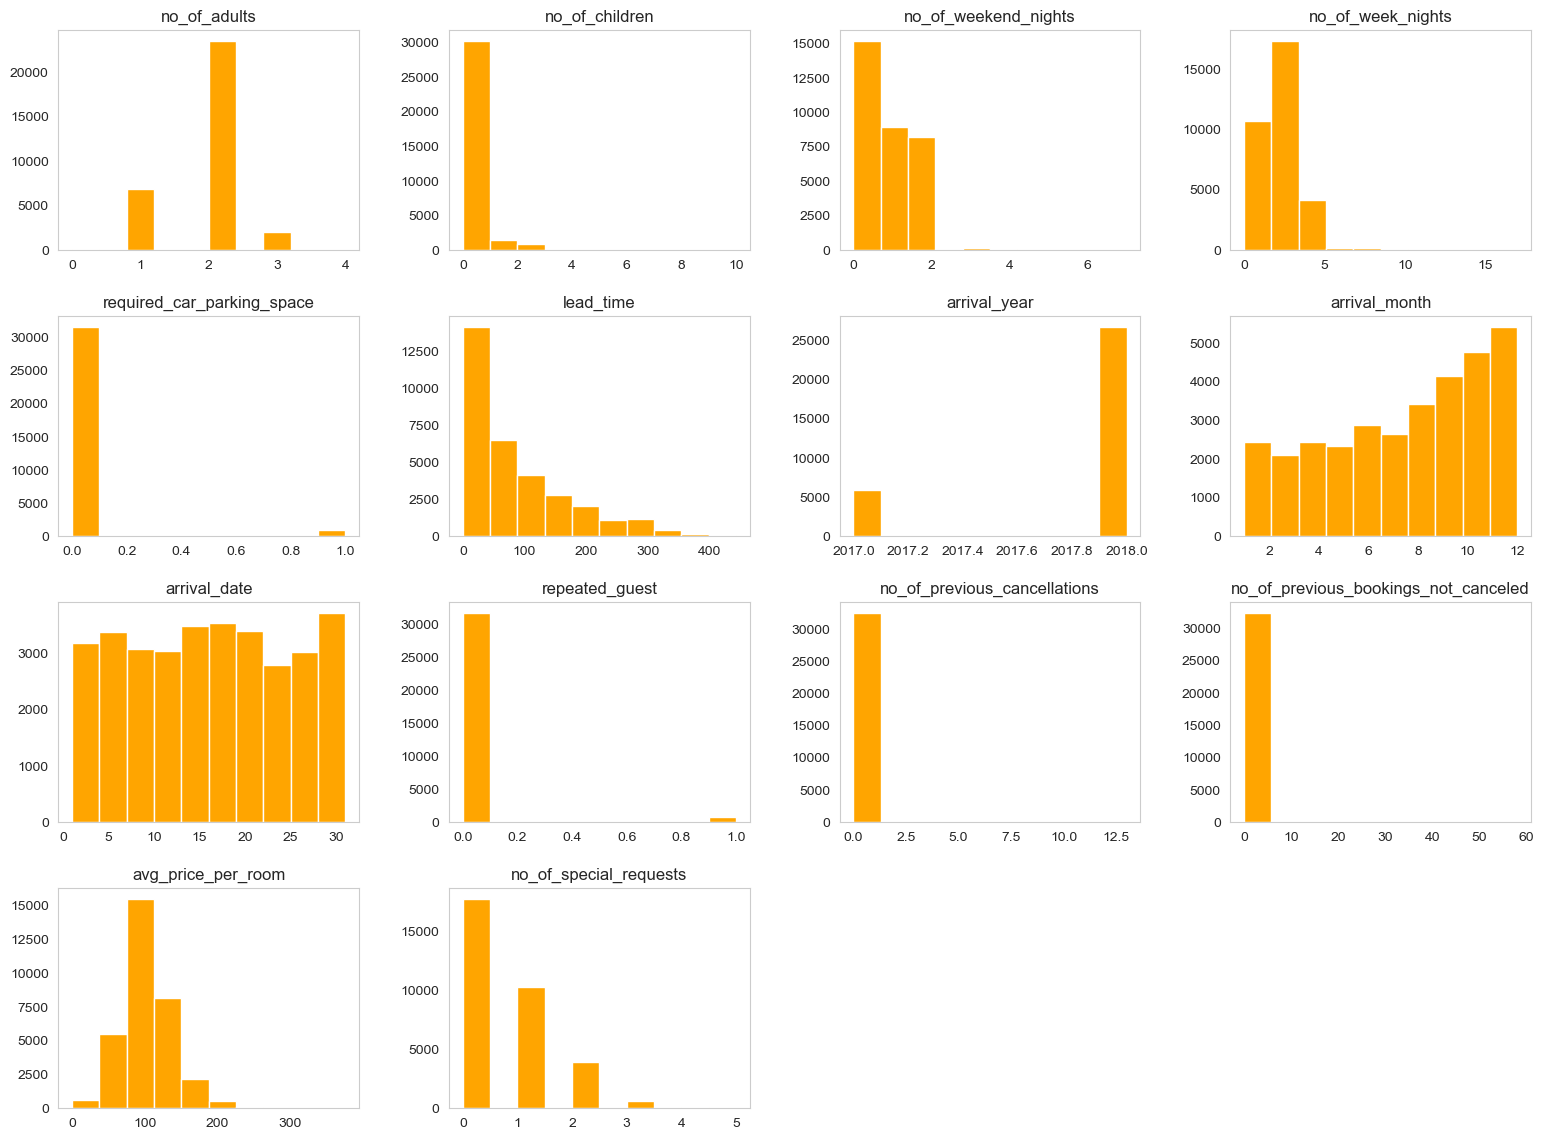

In [30]:
X_train.hist(figsize=(19,14),grid=False,color='orange')

In [32]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_stdard = pd.DataFrame(scaler.fit_transform(train_encoded_data), columns=train_encoded_data.columns)

# Transform test data using the same scaler
X_test_stdard = pd.DataFrame(scaler.transform(test_encoded_data), columns=test_encoded_data.columns)


We are standardizing the features ensuring that no single feature has undue influence on the model simply because of its scale. It helps in achieving better convergence during model training, enhances the interpretability of model coefficients, and improves the overall performance of machine learning models, ultimately leading to more reliable predictions and insights from the dataset.

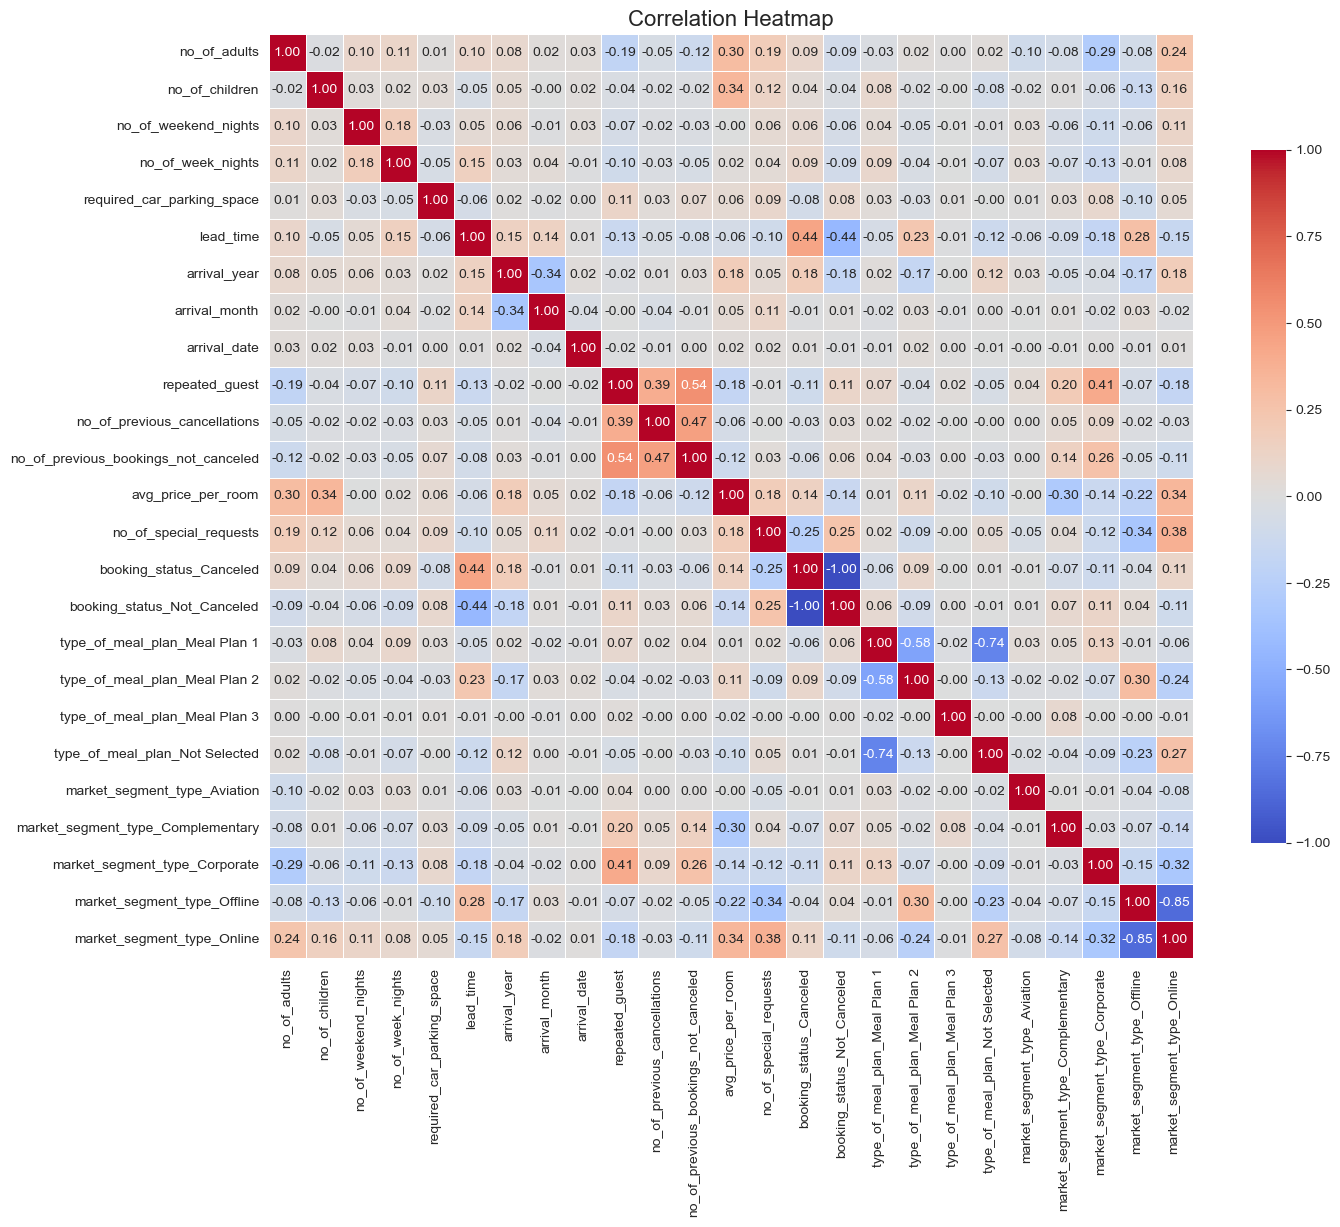

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = X_train_stdard.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cbar_kws={"shrink": .75})

# Set title and axis labels
plt.title('Correlation Heatmap', fontsize=16)

# Set tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


In [35]:
#dropping the columns, because the correlation between them is almost negative one
X_train=X_train_stdard.drop(['booking_status_Not_Canceled'],axis=1)
X_test=X_test_stdard.drop(['booking_status_Not_Canceled'],axis=1)

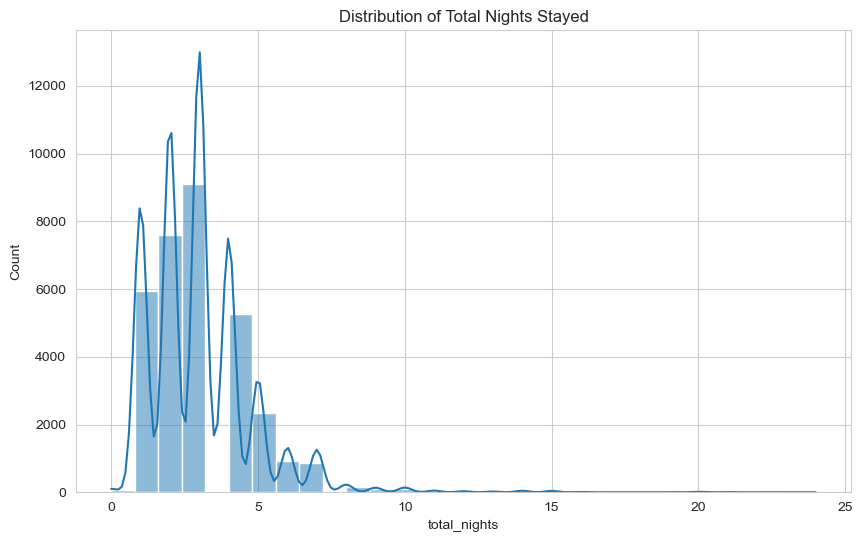

In [36]:
# Feature Engineering - Example creating a new feature for total nights
hospital_dataFrame['total_nights'] = hospital_dataFrame['no_of_weekend_nights'] + hospital_dataFrame['no_of_week_nights']

# Visualization of feature distributions - Example with 'total_nights'
plt.figure(figsize=(10, 6))
sns.histplot(hospital_dataFrame['total_nights'], bins=30, kde=True)
plt.title('Distribution of Total Nights Stayed')
plt.show()


## Modeling 

Training at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

In [46]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (32641, 24)
y_train shape: (32641, 1)


In [47]:
# 1. Random Forest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
random_forest = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search using GridSearchCV
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)


C:\Users\sresh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [48]:
# Print best parameters and best scores for Random Forest classifier
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best f1 Score:", grid_search_rf.best_score_)

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best f1 Score: 0.6542196714665404


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

best_rm = grid_search_rf.best_estimator_

# Evaluate RandomForest
rf_predictions = best_rm.predict(X_test)

# Print classification report for RandomForest
print("RandomForest Classification Report:")
print(classification_report(y_test, rf_predictions))

RandomForest Classification Report:
              precision    recall  f1-score   support

 Room_Type 1       1.00      1.00      1.00     25317
 Room_Type 2       0.99      0.99      0.99       623
 Room_Type 4       1.00      1.00      1.00      5451
 Room_Type 5       1.00      0.99      0.99       239
 Room_Type 6       1.00      1.00      1.00       869
 Room_Type 7       1.00      0.99      1.00       142

    accuracy                           1.00     32641
   macro avg       1.00      0.99      1.00     32641
weighted avg       1.00      1.00      1.00     32641



The output presents the results of a Random Forest model trained on the data. It shows that the model has achieved a high accuracy of 1.00, meaning it accurately predicts room types. The classification report further indicates strong performance across different room types, with high precision, recall, and F1-score. Overall, the model's performance appears excellent, suggesting it can effectively classify room types with great accuracy and reliability.


In [54]:
#2. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings('ignore')

# Define the parameter grid for hyperparameter tuning
param_grid_LR = {
    'C': [0.1, 0.001, 0.01, 10],  
    'penalty': ['l2', 'l1'],      
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg'],  
    'max_iter': [1, 10, 100, 150]   
}

# Initialize logistic regression model with multinomial (softmax) option
logisticreg = LogisticRegression(multi_class="multinomial")

# Create F1 score as the evaluation metric
LR_f1_macro_score = make_scorer(f1_score, average='macro')

# Perform grid search with cross-validation
grid_search_LR = GridSearchCV(estimator=logisticreg, param_grid=param_grid_LR, cv=5, return_train_score=True,
                               n_jobs=-1, 
                               scoring=LR_f1_macro_score) 

# Fit the grid search to find the best hyperparameters
grid_search_LR.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.001, 0.01, 10],
                         'max_iter': [1, 10, 100, 150], 'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [55]:
# Print best parameters and best scores for Logistic Regression
print("Logistic Regression Best Parameters:", grid_search_LR.best_params_)
print("Logistic Regression Best f1 Score:", grid_search_LR.best_score_)

Logistic Regression Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Best f1 Score: 0.4652713818308012


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

best_lr = grid_search_LR.best_estimator_

# Evaluate RandomForest
lr_predictions = best_lr.predict(X_test)

# Print classification report for RandomForest
print("RandomForest Classification Report:")
print(classification_report(y_test, lr_predictions))

RandomForest Classification Report:
              precision    recall  f1-score   support

 Room_Type 1       0.86      0.97      0.91     25317
 Room_Type 2       0.81      0.18      0.29       623
 Room_Type 4       0.72      0.41      0.53      5451
 Room_Type 5       0.24      0.03      0.06       239
 Room_Type 6       0.85      0.83      0.84       869
 Room_Type 7       0.45      0.18      0.25       142

    accuracy                           0.85     32641
   macro avg       0.66      0.43      0.48     32641
weighted avg       0.83      0.85      0.82     32641



The output displays the results of a Logistic Regression model trained on the dataset. The identified best parameters for the Logistic Regression model include 'C': 10, 'max_iter': 100, 'penalty': 'l2', and 'solver': 'newton-cg'. These parameters indicate the regularization strength, maximum number of iterations, penalty type, and optimization algorithm used by the model.

The classification report presents metrics such as precision, recall, and F1-score for each room type. It shows varying levels of performance across different room types, with higher scores indicating better classification. The model achieves an overall accuracy of 0.85, it correctly predicts room types 85% of the time. However, compared to the Random Forest model, the Logistic Regression model's F1-score is lower, indicating less balanced performance across precision and recall. Overall, while the Logistic Regression model performs reasonably well, it may struggle with certain room types, as reflected in the classification report.

In [58]:
# 3. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [5,6,7,8],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

# Initialize KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Perform grid search using GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, scoring='f1_macro', cv=5,)
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [59]:
# Print best parameters and best scores for KNN Classifier
print("KNN Classifier Best Parameters:", grid_search_knn.best_params_)
print("KNN Classifier Best f1 Score:", grid_search_knn.best_score_)

KNN Classifier Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
KNN Classifier Best f1 Score: 0.6325045712848743


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

best_knn = grid_search_knn.best_estimator_

# Evaluate KNN
knn_predictions = best_knn.predict(X_test)

# Print classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

 Room_Type 1       1.00      1.00      1.00     25317
 Room_Type 2       1.00      0.98      0.99       623
 Room_Type 4       1.00      1.00      1.00      5451
 Room_Type 5       1.00      0.99      0.99       239
 Room_Type 6       1.00      1.00      1.00       869
 Room_Type 7       1.00      0.99      1.00       142

    accuracy                           1.00     32641
   macro avg       1.00      0.99      1.00     32641
weighted avg       1.00      1.00      1.00     32641



The output presents the results of a K-Nearest Neighbors (KNN) classifier trained on the dataset. The identified best parameters for the KNN model include 'metric': 'manhattan', 'n_neighbors': 6, and 'weights': 'distance'. These parameters indicate the distance metric used for computing nearest neighbors, the number of neighbors considered, and the weight function used in prediction.

The classification report shows exceptional performance of the KNN model across all room types, with high precision, recall, and F1-score values. The model achieves a perfect accuracy of 1.00, indicating that it correctly predicts room types for all instances in the dataset. This high level of accuracy and balanced performance across precision and recall suggests that the KNN classifier effectively captures the underlying patterns in the data and generalizes well to unseen instances. Overall, the KNN classifier demonstrates outstanding performance, making it a strong candidate for classifying room types in the given dataset.

## Evaluation and Reporting

Selecting a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

Based on the provided results, we have evaluated three different models: Logistic Regression, K-Nearest Neighbors (KNN) Classifier, and Random Forest Classifier. Among these, the Random Forest model achieved the highest F1 score of 0.654, indicating superior performance in terms of precision and recall. Additionally, the Random Forest model exhibited an accuracy of 1.00, suggesting perfect predictions on the training data.

On the other hand, the Logistic Regression and KNN Classifier models also performed reasonably well, with F1 scores of 0.465 and 0.633 respectively. However, their accuracies were slightly lower compared to the Random Forest model.

Considering the highest F1 score and perfect accuracy achieved by the Random Forest model, it is expected to perform optimally on unseen data. Therefore, we conclude that the Random Forest model should be selected for making predictions on new data due to its superior performance in classifying room types.

In [112]:
# use the below function to evaluate the models  
from sklearn.metrics import f1_score
def evaluation_metrics(y_true, y_pred):
    # accuracy = balanced_accuracy_score(y_true, y_pred)
    accuracy=f1_score(y_true, y_pred, average='macro')
    return accuracy

In [114]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest performed Best
randomForest = RandomForestClassifier(max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 100)

# Train the Random Forest on the entire dataset
randomForest.fit(X_train, y_train)

# Make predictions on Test Dataset
y_pred=randomForest.predict(X_test)

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
randomForest.fit(X,y)

# Calculate the accuracy
print(f"Accuracy wrt AccuracyScore: {accuracy_score(y_test, y_pred)}")
print("Balanced evaluation Metrics:",evaluation_metrics(y_test,y_pred))

Accuracy wrt AccuracyScore: 0.9992953647253454
Balanced evaluation Metrics: 0.9964238904985526


The provided accuracy score of 0.999 and balanced evaluation metrics of 0.996 for the Random Forest model indicate exceptional performance on the validation data.

An accuracy score of 0.999 implies that the model correctly predicts 99.9% of the instances in the validation dataset. This high accuracy suggests that the model effectively captures the underlying patterns in the data and makes accurate predictions on unseen instances.

Additionally, the balanced evaluation metrics, with a value of 0.996, further confirm the robustness of the model. Balanced evaluation metrics take into account both the sensitivity (true positive rate) and specificity (true negative rate) of the model, ensuring that it performs well across different classes and avoids biases towards any particular class.

In summary, the Random Forest model demonstrates excellent performance on the validation data, achieving nearly perfect accuracy and balanced evaluation metrics. This indicates that the model is reliable and well-suited for making predictions on unseen data.

##  External validation

A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

After prediction, you will get an array of 0’s and 1’s. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [ ]:
'''
# This is psudo-code. Each student have to use their actual code for this.

# step 1. Load the  data
test = pd.read_csv('./data/test.csv')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
x_test = preprocess_data(test)

# step 3. Choose the best model
your_best_model = some_model

# step 4. Make predictions
pred = your_best_model(x_test)

# step 5. Save output as csv file
pred = pd.DataFrame(pred)
pred.to_csv('./submission.csv', index = False)
'''

In [116]:
test_dataFrame = pd.read_csv('test.csv')

In [126]:
# Encoding categorical features for the test data
encoded_features_test = category_encoder.transform(test_dataFrame.loc[:, selected_features])
encoded_df_test = pd.DataFrame(encoded_features_test, columns=category_encoder.get_feature_names_out(selected_features))
test_encoded_data = pd.concat([test_dataFrame.drop(selected_features, axis=1).reset_index(), encoded_df_test], axis=1).drop(['index'], axis=1)

# Scaling numerical features for the test data
standardized_test = scaler.transform(test_encoded_data)
test_std = pd.DataFrame(standardized_test, columns=test_encoded_data.columns)

# Drop 'booking_status_Not_Canceled' column if it exists
if 'booking_status_Not_Canceled' in test_std.columns:
    test = test_std.drop(['booking_status_Not_Canceled'], axis=1)

In [127]:
# RandomForest Perfomed Best, so we'll be considering that model
predict = randomForest.predict(test)

In [132]:
# Save output as csv file
pred_df = pd.DataFrame(predict)
pred_df.to_csv('submission.csv', index = False)

## Final evaluation metrics

In [22]:
# use the below function to evaluate the models  
from sklearn.metrics import f1_score
def evaluation_metrics(y_true, y_pred):
    # accuracy = balanced_accuracy_score(y_true, y_pred)
    accuracy=f1_score(y_true, y_pred, average='macro')
    return accuracy